# Stage I

1) сгенерить waveform синуса,  с напр., 10k отсчетов (на один период) (1 Hz)

2) нарисовать его, нарисовать fft, и попробовать правильно подписать оси и деления шкал на них ;)

3) сымитировать оцифровку -- понизить чсило отсчетов например а) до 500, и до 25 — и повторить п.2, при этом увидеть какие искажения в спектре возникли

4) сымитировать "кривую" оцифровку -- при уменьшении частоты дескритезации брать отсчеты с разным смещением в лево и вправо,
(аналог физовых искажений, jitter), и снова посмотреть 2) на 5-10% периода

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from typing import Tuple

%matplotlib inline

In [11]:
def sin_tick(n: int) -> Tuple[np.ndarray, np.ndarray]:
    x = np.linspace(0, 2, n, endpoint=True)
    y = np.sin(2 * np.pi * x)
    return x, y

# FFT

[scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html)

`fft(x, n)` - Return discrete Fourier transform of real or complex sequence.

`fftshift(x)` - Shift the zero-frequency component to the center of the spectrum.













 N=10000
-3.141592653589793 -3.141592653589793


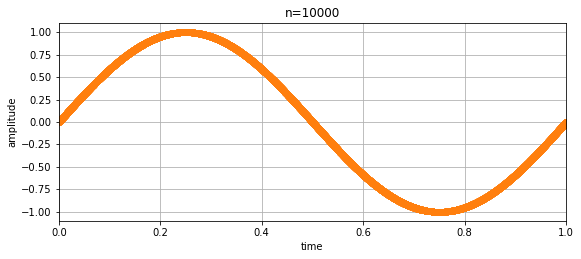

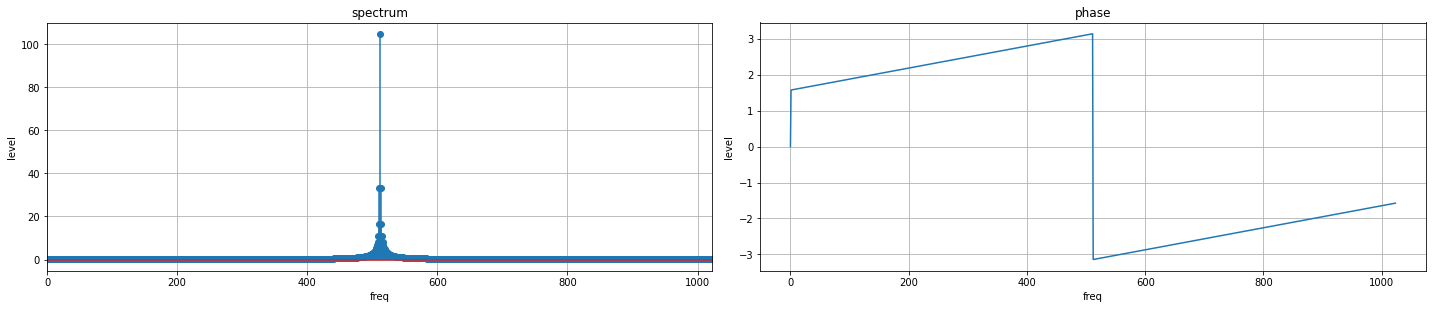













 N=5000
-3.141592653589793 -3.141592653589793


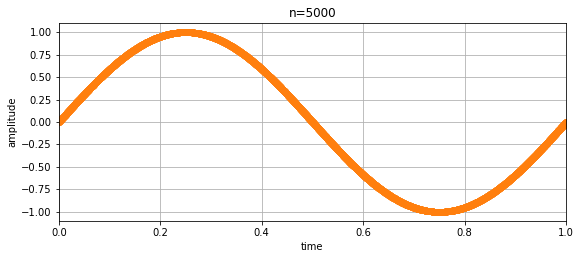

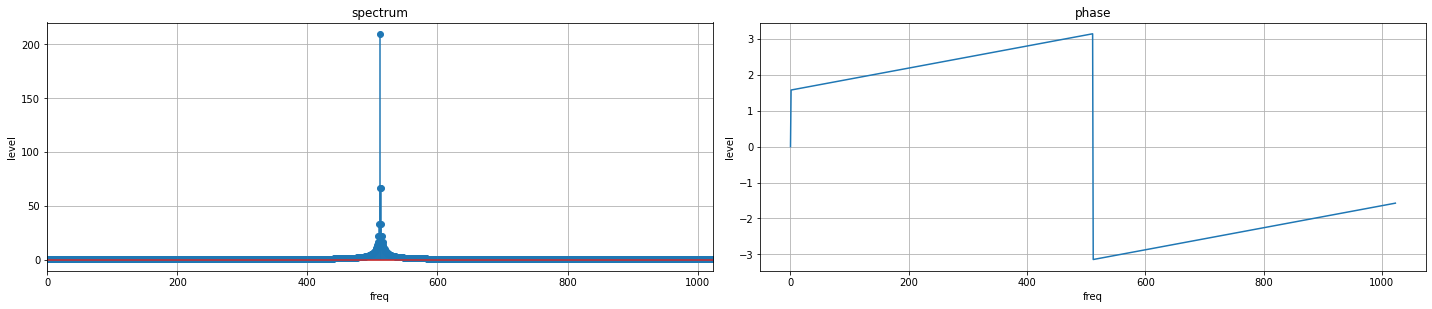













 N=500
-3.141592653589793 -3.141592653589793


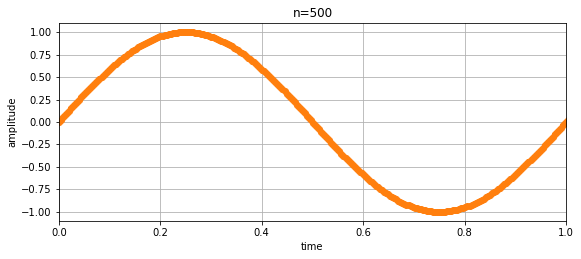

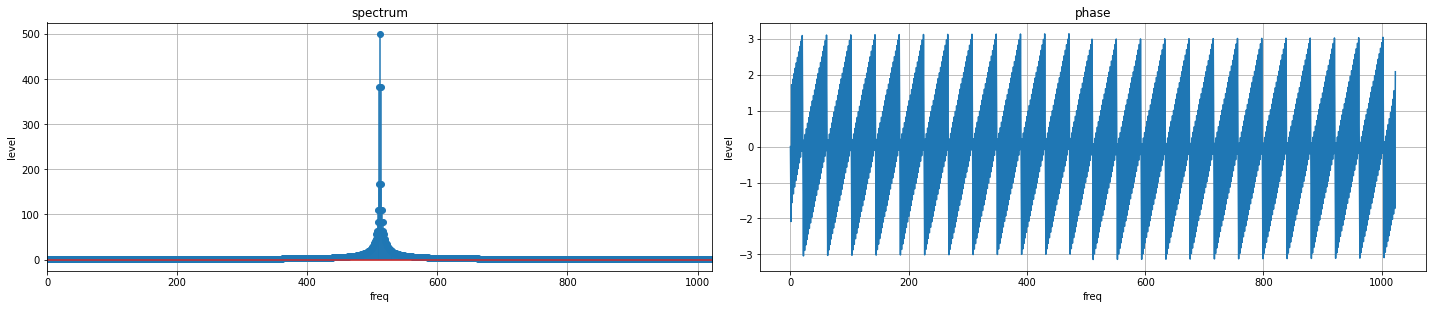













 N=100
-3.141592653589793 -3.141592653589793


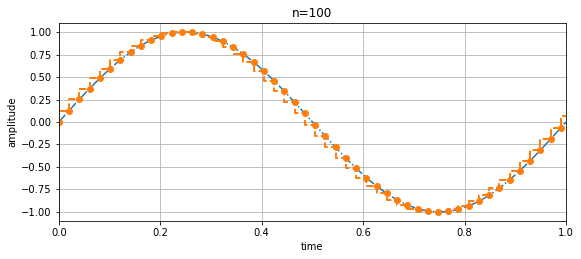

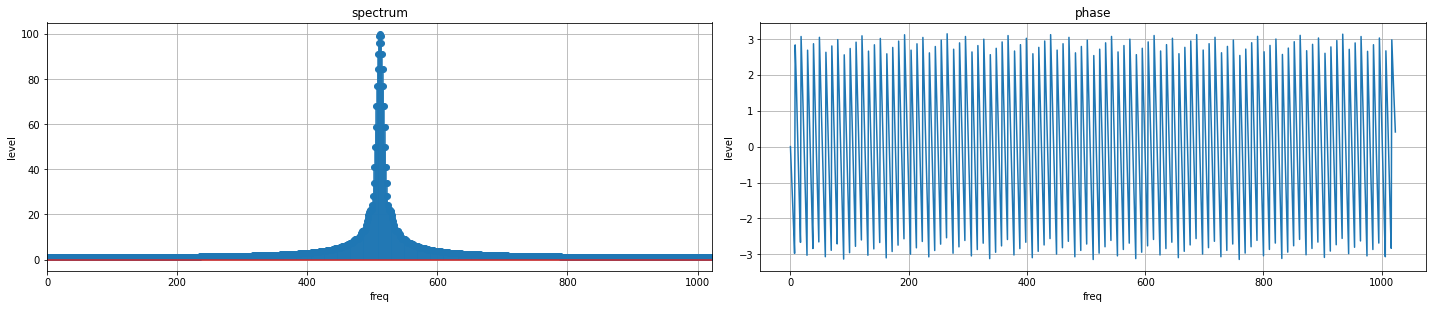













 N=25
-3.1405967781494915 -3.1405967781494915


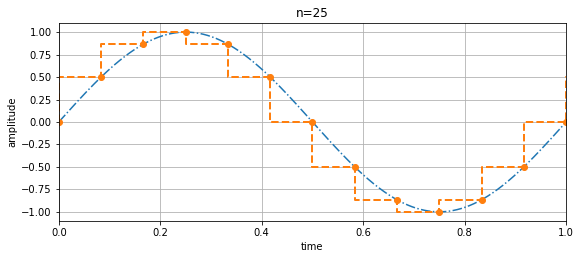

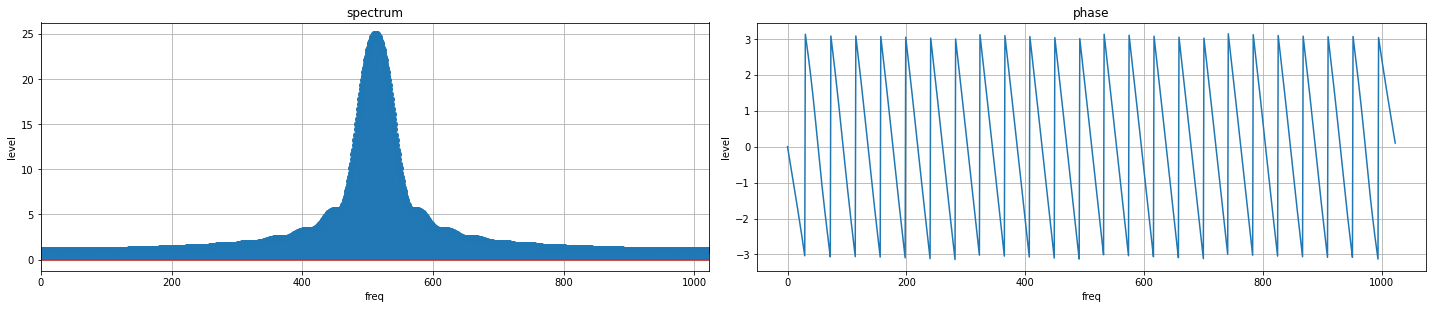













 N=10
-3.141592653589793 -3.141592653589793


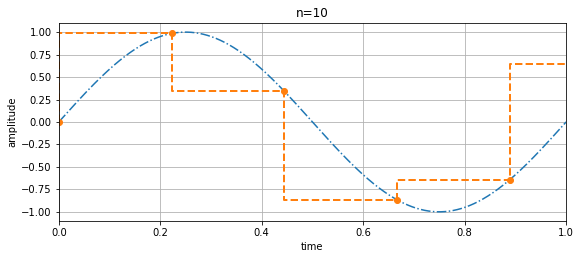

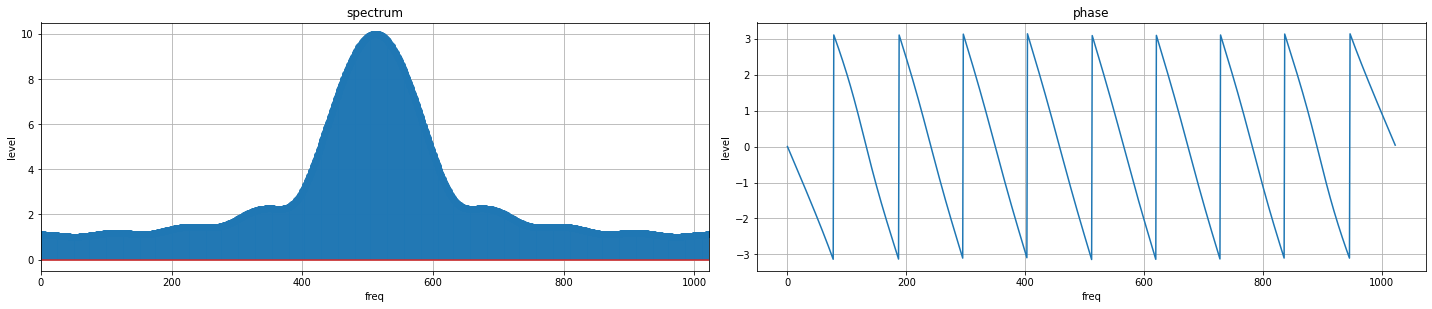

In [12]:
ideal_x, ideal_y = sin_tick(10000)

N_FFT = 1024

for i, n in enumerate((10000, 5000, 500, 100, 25, 10)):
    print(f"\n\n\n\n\n\n\n\n\n\n\n\n N={n}")
    fig = plt.figure(figsize=(20, 8))
    plt.subplot(2, 2, 1)
    plt.xlim([0, 1])
    plt.grid()
    plt.title(f'n={n}')
    plt.plot(ideal_x, ideal_y, '-.')  # ideal
    x, y = sin_tick(n)
    plt.step(x, y, '--o', linewidth=2.0)
    plt.xlabel("time")
    plt.ylabel("amplitude")

    x_fft = fftshift(fft(x, N_FFT))

    fig = plt.figure(figsize=(20, 8))

    # spectrum
    plt.subplot(2, 2, 3)
    plt.grid()
    plt.title('spectrum')
    plt.xlabel("freq")
    plt.ylabel("level")
    plt.xlim([0, N_FFT-1])
    plt.stem(np.abs(x_fft))

    x_fft_us = fft(x, N_FFT)
    # phase
    plt.subplot(2, 2, 4)
    plt.grid()
    plt.title('phase')
    plt.xlabel("freq")
    plt.ylabel("level")
    plt.plot(np.angle(x_fft_us))
    print(np.min(np.angle(x_fft_us)), np.min(np.angle(x_fft_us)))

    plt.tight_layout()
    plt.show()
